In [37]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [38]:
print(np.__version__)
print(pd.__version__)
print(sklearn.__version__)

1.24.3
1.5.3
1.3.0


In [39]:
crop_data = pd.read_csv("crop_recommendation_dataset.csv")
crop_data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [40]:
crop_data.size

17600

In [41]:
crop_data.shape   

(2200, 8)

In [42]:
crop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [43]:
crop_data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [44]:
crop_data.duplicated().sum()

0

In [45]:
crop_data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [46]:
crop_data.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [47]:
crop_data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [48]:
crop_data['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [49]:
crop_data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

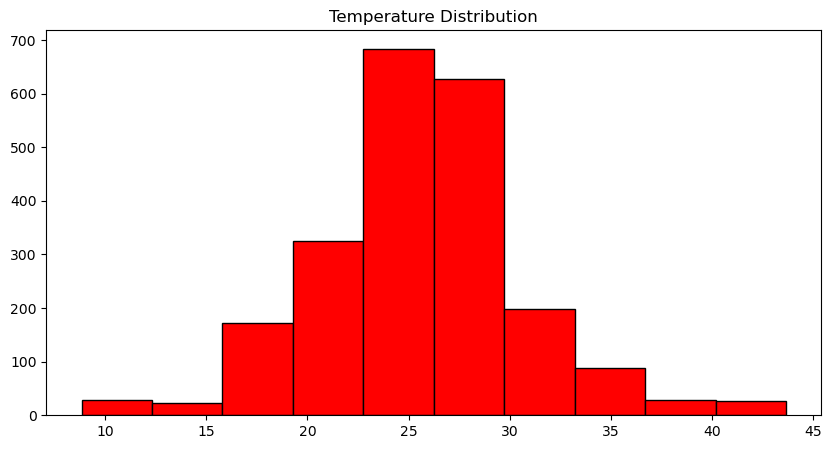

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.hist(crop_data['temperature'], color='red', edgecolor='black')
plt.title("Temperature Distribution")
plt.show()

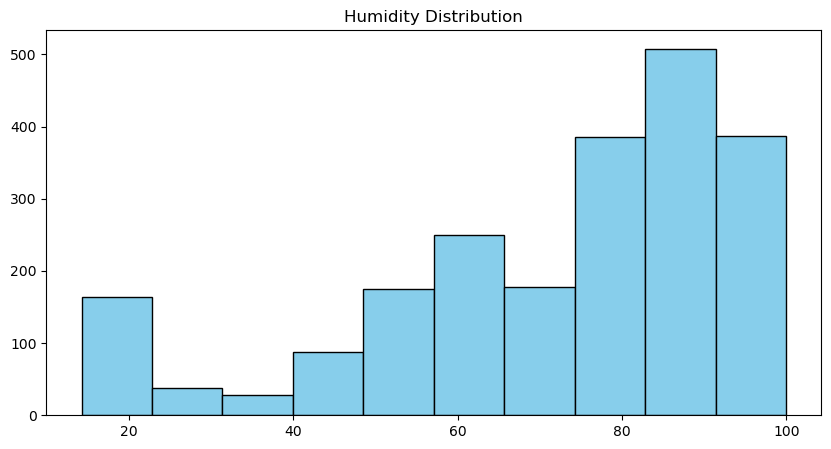

In [51]:
plt.figure(figsize=(10, 5))
plt.hist(crop_data['humidity'], color='skyblue', edgecolor='black')
plt.title("Humidity Distribution")
plt.show()

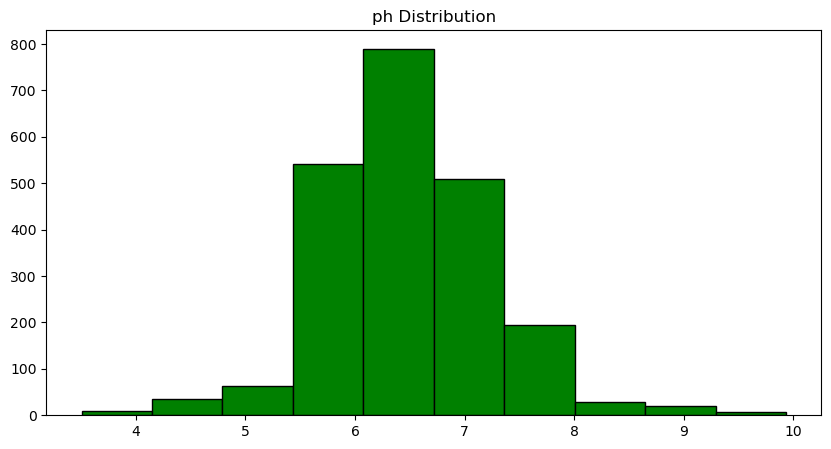

In [52]:
plt.figure(figsize=(10, 5))
plt.hist(crop_data['ph'], color='green', edgecolor='black')
plt.title("ph Distribution")
plt.show()


In [53]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
crop_data['label_encoded'] = label_encoder.fit_transform(crop_data['label'])

print(crop_data[['label', 'label_encoded']].head())
print(crop_data[['label', 'label_encoded']].tail())



  label  label_encoded
0  rice             20
1  rice             20
2  rice             20
3  rice             20
4  rice             20
       label  label_encoded
2195  coffee              5
2196  coffee              5
2197  coffee              5
2198  coffee              5
2199  coffee              5


In [54]:
features = crop_data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
target = crop_data['label_encoded']  


In [55]:
features.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [56]:
target.head()

0    20
1    20
2    20
3    20
4    20
Name: label_encoded, dtype: int32

In [57]:
accuracy = []
model = []

In [58]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state=42)

In [59]:
Xtrain

,N,P,K,temperature,humidity,ph,rainfall
1656,17,16,14,16.396243,92.181519,6.625539,102.944161
752,37,79,19,27.543848,69.347863,7.143943,69.408782
892,7,73,25,27.521856,63.132153,7.288057,45.208411
1041,101,70,48,25.360592,75.031933,6.012697,116.553145
1179,0,17,30,35.474783,47.972305,6.279134,97.790725
...,...,...,...,...,...,...,...
1638,10,5,5,21.213070,91.353492,7.817846,112.983436
1095,108,94,47,27.359116,84.546250,6.387431,90.812505
1130,11,36,31,27.920633,51.779659,6.475449,100.258567
1294,11,124,204,13.429886,80.066340,6.361141,71.400430


In [60]:
Ytrain

1656    16
752      2
892     10
1041     1
1179    12
        ..
1638    16
1095     1
1130    12
1294     7
860     10
Name: label_encoded, Length: 1760, dtype: int32

In [61]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier()

DecisionTree.fit(Xtrain,Ytrain)

ypred = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, ypred)

accuracy.append(x)
model.append('Decision Tree')

print("DecisionTrees's Accuracy is: ", x*100)

DecisionTrees's Accuracy is:  98.63636363636363


In [62]:
from sklearn.svm import SVC

SVM = SVC()
SVM.fit(Xtrain,Ytrain)

predicted_values = SVM.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
accuracy.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x*100)

SVM's Accuracy is:  96.13636363636363


In [63]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
accuracy.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x*100)

Logistic Regression's Accuracy is:  94.54545454545455


In [64]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(Xtrain,Ytrain)

predicted_values_RF = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values_RF)
accuracy.append(x)
model.append('Random Forest')

print("RF's Accuracy is: ", x*100)

RF's Accuracy is:  99.31818181818181


In [65]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(Xtrain, Ytrain)
predicted_values_knn = knn.predict(Xtest)
accuracy_knn = metrics.accuracy_score(Ytest, predicted_values_knn)

accuracy.append(accuracy_knn)
model.append('KNN')

print("KNN's Accuracy is: ", accuracy_knn * 100)

KNN's Accuracy is:  97.04545454545455


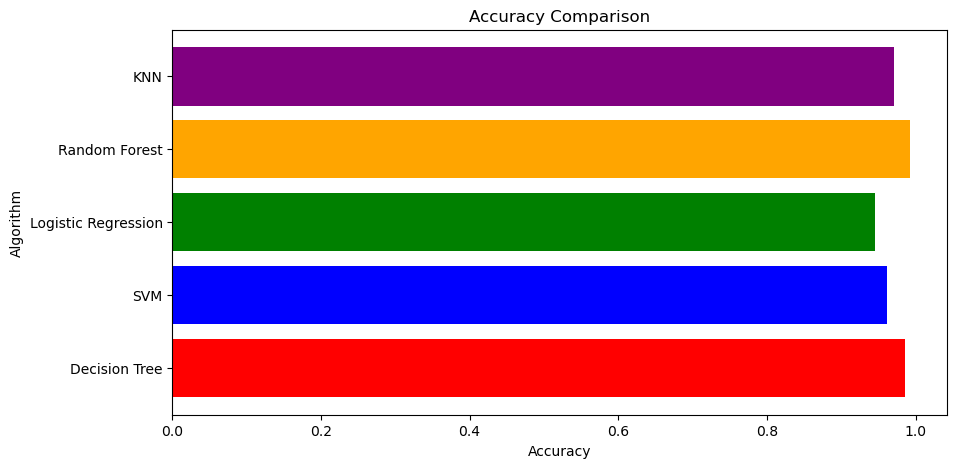

In [66]:
plt.figure(figsize=[10, 5], dpi=100)
plt.barh(model, accuracy, color=['red', 'blue', 'green', 'orange', 'purple'])
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
plt.show()


In [67]:
for i in range(len(model)):
    print(model[i] ," - ",round(accuracy[i]*100,2))


Decision Tree  -  98.64
SVM  -  96.14
Logistic Regression  -  94.55
Random Forest  -  99.32
KNN  -  97.05


In [68]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)

actual_label = label_encoder.inverse_transform(prediction)
print("Predicted Crop :", actual_label[0])

Predicted Crop : coffee


In [69]:
def recommendation(N,P,k,temperature,humidity,ph,rainfall):
    features = np.array([[N,P,k,temperature,humidity,ph,rainfall]])

    
    prediction = RF.predict(features)
    
    actual_label = label_encoder.inverse_transform(prediction)
    
    return actual_label[0]

In [70]:
recommendation(83, 45, 60, 28, 70.3, 7.0, 150.9)

'coffee'

In [71]:
N = 90
P = 42
k = 43
temperature = 21
humidity = 82
ph = 6.5
rainfall = 202

predict = recommendation(N, P, k, temperature, humidity, ph, rainfall)

print(f"The best crop to be cultivated is: {predict.title()}")

The best crop to be cultivated is: Rice


In [72]:
'''import pickle
RF_pkl_filename = 'RandomForest.pkl'
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
RF_Model_pkl.close()
'''

"import pickle\nRF_pkl_filename = 'RandomForest.pkl'\nRF_Model_pkl = open(RF_pkl_filename, 'wb')\npickle.dump(RF, RF_Model_pkl)\nRF_Model_pkl.close()\n"

In [73]:
print("hello")

hello
